## NYPD Shooting Incident Data (Historic)


*   Dataset Name : NYPD_Shootings_Historic
*   Agency Name : Police Department (NYPD)
*   Dataset Description : List of every shooting incident that occurred in NYC  going back to 2013 through the end of the previous calendar year.



> **Why is this data collected?** 

&emsp;&emsp;This is a breakdown of every shooting incident that occurred in NYC  going back to 2013 through the end of the previous calendar year.
 This data is manually extracted every quarter and reviewed by the Office of Management Analysis and Planning before being posted on the NYPD website. 
 Each record represents a shooting incident in NYC and includes information abot the event, the location and time of occurrence. 
In addition, information related to suspect and victim demographics is also included.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('NYPD_Shooting_Incident_Data__Historic_.csv')
df

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,236168668,11/11/2021,15:04:00,BROOKLYN,79,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,9.963130e+05,187499.000000,40.681318,-73.956509,POINT (-73.95650899099996 40.68131820000008)
1,231008085,07/16/2021,22:05:00,BROOKLYN,72,0.0,NaN,False,45-64,M,ASIAN / PACIFIC ISLANDER,25-44,M,ASIAN / PACIFIC ISLANDER,9.818450e+05,171118.000000,40.636364,-74.008667,POINT (-74.00866668999998 40.63636384100005)
2,230717903,07/11/2021,01:09:00,BROOKLYN,79,0.0,NaN,False,<18,M,BLACK,25-44,M,BLACK,9.965460e+05,187436.000000,40.681145,-73.955669,POINT (-73.95566903799994 40.68114495900005)
3,237712309,12/11/2021,13:42:00,BROOKLYN,81,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1.001139e+06,192775.000000,40.695792,-73.939096,POINT (-73.939095905 40.69579171600003)
4,224465521,02/16/2021,20:00:00,QUEENS,113,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1.050710e+06,184826.000000,40.673740,-73.760411,POINT (-73.76041066999993 40.67374017600008)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25591,186329304,08/12/2018,19:50:00,BROOKLYN,84,0.0,NaN,False,25-44,M,BLACK,65+,M,BLACK,9.891547e+05,193164.265625,40.696875,-73.982314,POINT (-73.98231375199998 40.69687491500008)
25592,29277330,05/26/2007,04:57:00,BROOKLYN,81,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1.005218e+06,190528.000000,40.689615,-73.924393,POINT (-73.92439311199996 40.689615497000034)
25593,77443443,02/25/2011,01:12:00,BROOKLYN,81,0.0,MULTI DWELL - APT BUILD,False,18-24,M,BLACK,<18,M,BLACK,1.003999e+06,187611.031250,40.681612,-73.928798,POINT (-73.92879814299994 40.681611891000045)
25594,176027888,03/17/2018,00:46:00,BRONX,43,0.0,NaN,False,25-44,M,UNKNOWN,25-44,M,WHITE HISPANIC,1.018728e+06,242744.234375,40.832893,-73.875408,POINT (-73.87540796899998 40.83289318000004)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25596 entries, 0 to 25595
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             25596 non-null  int64  
 1   OCCUR_DATE               25596 non-null  object 
 2   OCCUR_TIME               25596 non-null  object 
 3   BORO                     25596 non-null  object 
 4   PRECINCT                 25596 non-null  int64  
 5   JURISDICTION_CODE        25594 non-null  float64
 6   LOCATION_DESC            10619 non-null  object 
 7   STATISTICAL_MURDER_FLAG  25596 non-null  bool   
 8   PERP_AGE_GROUP           16252 non-null  object 
 9   PERP_SEX                 16286 non-null  object 
 10  PERP_RACE                16286 non-null  object 
 11  VIC_AGE_GROUP            25596 non-null  object 
 12  VIC_SEX                  25596 non-null  object 
 13  VIC_RACE                 25596 non-null  object 
 14  X_COORD_CD            

## Imputation process of replacing missing data

> **List of columns null values**
*   JURISDICTION_CODE
*   LOCATION_DESC
*   PERP_AGE_GROUP
*   PERP_SEX
*   PERP_RACE



In [ ]:
# Find count unique values in LOCATION_DESC
df.groupby(['LOCATION_DESC'])['INCIDENT_KEY'].count()

LOCATION_DESC
ATM                             1
BANK                            3
BAR/NIGHT CLUB                588
BEAUTY/NAIL SALON             105
CANDY STORE                     6
CHAIN STORE                     5
CHECK CASH                      1
CLOTHING BOUTIQUE              14
COMMERCIAL BLDG               265
DEPT STORE                      9
DOCTOR/DENTIST                  1
DRUG STORE                     11
DRY CLEANER/LAUNDRY            31
FACTORY/WAREHOUSE               6
FAST FOOD                      99
GAS STATION                    61
GROCERY/BODEGA                622
GYM/FITNESS FACILITY            3
HOSPITAL                       47
HOTEL/MOTEL                    32
JEWELRY STORE                  12
LIQUOR STORE                   36
LOAN COMPANY                    1
MULTI DWELL - APT BUILD      2664
MULTI DWELL - PUBLIC HOUS    4559
NONE                          175
PHOTO/COPY STORE                1
PVT HOUSE                     893
RESTAURANT/DINER              194


In [ ]:
# Find count unique values in PERP_AGE_GROUP
df.groupby('PERP_AGE_GROUP')['INCIDENT_KEY'].count()

PERP_AGE_GROUP
1020          1
18-24      5844
224           1
25-44      5202
45-64       535
65+          57
940           1
<18        1463
UNKNOWN    3148
Name: INCIDENT_KEY, dtype: int64

In [ ]:
# Null values instead with Unknown/Not Available/Not Reported
df['LOCATION_DESC'] = df['LOCATION_DESC'].fillna('UNKNOWN')

In [ ]:
# Inconsistent values instead with "UNKNOWN"
df['PERP_AGE_GROUP'].replace({'1020':"UNKNOWN",'940':"UNKNOWN",'224':"UNKNOWN"},inplace = True)

In [ ]:
# Null values instead "UNKNOWN"
df['PERP_AGE_GROUP'] = df['PERP_AGE_GROUP'].fillna('UNKNOWN')

In [ ]:
# Find count unique values in PERP_SEX
df.groupby('PERP_SEX')['INCIDENT_KEY'].count()

PERP_SEX
F      371
M    14416
U     1499
Name: INCIDENT_KEY, dtype: int64

In [ ]:
# Null values instead "U - UNKNOWN"
df['PERP_SEX'] = df['PERP_SEX'].fillna('U')

In [ ]:
# Find count unique values in PERP_SEX
df.groupby('PERP_RACE')['INCIDENT_KEY'].count()

PERP_RACE
AMERICAN INDIAN/ALASKAN NATIVE        2
ASIAN / PACIFIC ISLANDER            141
BLACK                             10668
BLACK HISPANIC                     1203
UNKNOWN                            1836
WHITE                               272
WHITE HISPANIC                     2164
Name: INCIDENT_KEY, dtype: int64

In [ ]:
# Null values instead "UNKNOWN"
df['PERP_RACE'] = df['PERP_RACE'].fillna('UNKNOWN')

In [ ]:
df.groupby('JURISDICTION_CODE')['INCIDENT_KEY'].count()

JURISDICTION_CODE
0.0    21321
1.0       59
2.0     4214
Name: INCIDENT_KEY, dtype: int64

In [ ]:
df[df['JURISDICTION_CODE'].isna()]

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
19710,33110745,07/13/2007,01:10:00,QUEENS,104,NaN,SOCIAL CLUB/POLICY LOCATI,False,<18,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,1009103.125,194183.000000,40.699638,-73.910370,POINT (-73.91037029699999 40.699637566000035)
23917,194525846,03/09/2019,02:41:00,MANHATTAN,25,NaN,UNKNOWN,False,UNKNOWN,M,BLACK,25-44,M,BLACK,1000472.375,230832.546875,40.800251,-73.941408,POINT (-73.94140810899995 40.800251339000056)


In [ ]:
# Null values instead "999 = non NYPD jurisdictions"
df['JURISDICTION_CODE'] = df['JURISDICTION_CODE'].fillna(999)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25596 entries, 0 to 25595
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             25596 non-null  int64  
 1   OCCUR_DATE               25596 non-null  object 
 2   OCCUR_TIME               25596 non-null  object 
 3   BORO                     25596 non-null  object 
 4   PRECINCT                 25596 non-null  int64  
 5   JURISDICTION_CODE        25596 non-null  float64
 6   LOCATION_DESC            25596 non-null  object 
 7   STATISTICAL_MURDER_FLAG  25596 non-null  bool   
 8   PERP_AGE_GROUP           25596 non-null  object 
 9   PERP_SEX                 25596 non-null  object 
 10  PERP_RACE                25596 non-null  object 
 11  VIC_AGE_GROUP            25596 non-null  object 
 12  VIC_SEX                  25596 non-null  object 
 13  VIC_RACE                 25596 non-null  object 
 14  X_COORD_CD            

# Visualization

In [ ]:
# Change type to datetime
df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'])

In [ ]:
df['hour']=df['OCCUR_TIME'].apply(lambda x : int(x.split(':')[0]))
df

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,Hour,hour
0,236168668,2021-11-11,15:04:00,BROOKLYN,79,0.0,UNKNOWN,False,UNKNOWN,U,...,18-24,M,BLACK,9.963130e+05,187499.000000,40.681318,-73.956509,POINT (-73.95650899099996 40.68131820000008),15,15
1,231008085,2021-07-16,22:05:00,BROOKLYN,72,0.0,UNKNOWN,False,45-64,M,...,25-44,M,ASIAN / PACIFIC ISLANDER,9.818450e+05,171118.000000,40.636364,-74.008667,POINT (-74.00866668999998 40.63636384100005),22,22
2,230717903,2021-07-11,01:09:00,BROOKLYN,79,0.0,UNKNOWN,False,<18,M,...,25-44,M,BLACK,9.965460e+05,187436.000000,40.681145,-73.955669,POINT (-73.95566903799994 40.68114495900005),1,1
3,237712309,2021-12-11,13:42:00,BROOKLYN,81,0.0,UNKNOWN,False,UNKNOWN,U,...,25-44,M,BLACK,1.001139e+06,192775.000000,40.695792,-73.939096,POINT (-73.939095905 40.69579171600003),13,13
4,224465521,2021-02-16,20:00:00,QUEENS,113,0.0,UNKNOWN,False,UNKNOWN,U,...,25-44,M,BLACK,1.050710e+06,184826.000000,40.673740,-73.760411,POINT (-73.76041066999993 40.67374017600008),20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25591,186329304,2018-08-12,19:50:00,BROOKLYN,84,0.0,UNKNOWN,False,25-44,M,...,65+,M,BLACK,9.891547e+05,193164.265625,40.696875,-73.982314,POINT (-73.98231375199998 40.69687491500008),19,19
25592,29277330,2007-05-26,04:57:00,BROOKLYN,81,0.0,UNKNOWN,False,UNKNOWN,U,...,25-44,M,BLACK,1.005218e+06,190528.000000,40.689615,-73.924393,POINT (-73.92439311199996 40.689615497000034),4,4
25593,77443443,2011-02-25,01:12:00,BROOKLYN,81,0.0,MULTI DWELL - APT BUILD,False,18-24,M,...,<18,M,BLACK,1.003999e+06,187611.031250,40.681612,-73.928798,POINT (-73.92879814299994 40.681611891000045),1,1
25594,176027888,2018-03-17,00:46:00,BRONX,43,0.0,UNKNOWN,False,25-44,M,...,25-44,M,WHITE HISPANIC,1.018728e+06,242744.234375,40.832893,-73.875408,POINT (-73.87540796899998 40.83289318000004),0,0


In [ ]:
def part_day(x):
  if  5 <= x < 12:
    return "Morning"
  elif 12 <= x < 17:
    return "Afternoon"
  elif 17 <= x < 21:
    return "Evening"
  elif x >= 21 :
    return "Night"
  elif 0 <= x <= 4:
    return "Night"

df['part_of_day'] = df['hour'].apply(lambda x: part_day(x))
df

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,hour,part_of_day
0,236168668,2021-11-11,15:04:00,BROOKLYN,79,0.0,UNKNOWN,False,UNKNOWN,U,...,18-24,M,BLACK,9.963130e+05,187499.000000,40.681318,-73.956509,POINT (-73.95650899099996 40.68131820000008),15,Afternoon
1,231008085,2021-07-16,22:05:00,BROOKLYN,72,0.0,UNKNOWN,False,45-64,M,...,25-44,M,ASIAN / PACIFIC ISLANDER,9.818450e+05,171118.000000,40.636364,-74.008667,POINT (-74.00866668999998 40.63636384100005),22,Night
2,230717903,2021-07-11,01:09:00,BROOKLYN,79,0.0,UNKNOWN,False,<18,M,...,25-44,M,BLACK,9.965460e+05,187436.000000,40.681145,-73.955669,POINT (-73.95566903799994 40.68114495900005),1,Night
3,237712309,2021-12-11,13:42:00,BROOKLYN,81,0.0,UNKNOWN,False,UNKNOWN,U,...,25-44,M,BLACK,1.001139e+06,192775.000000,40.695792,-73.939096,POINT (-73.939095905 40.69579171600003),13,Afternoon
4,224465521,2021-02-16,20:00:00,QUEENS,113,0.0,UNKNOWN,False,UNKNOWN,U,...,25-44,M,BLACK,1.050710e+06,184826.000000,40.673740,-73.760411,POINT (-73.76041066999993 40.67374017600008),20,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25591,186329304,2018-08-12,19:50:00,BROOKLYN,84,0.0,UNKNOWN,False,25-44,M,...,65+,M,BLACK,9.891547e+05,193164.265625,40.696875,-73.982314,POINT (-73.98231375199998 40.69687491500008),19,Evening
25592,29277330,2007-05-26,04:57:00,BROOKLYN,81,0.0,UNKNOWN,False,UNKNOWN,U,...,25-44,M,BLACK,1.005218e+06,190528.000000,40.689615,-73.924393,POINT (-73.92439311199996 40.689615497000034),4,Night
25593,77443443,2011-02-25,01:12:00,BROOKLYN,81,0.0,MULTI DWELL - APT BUILD,False,18-24,M,...,<18,M,BLACK,1.003999e+06,187611.031250,40.681612,-73.928798,POINT (-73.92879814299994 40.681611891000045),1,Night
25594,176027888,2018-03-17,00:46:00,BRONX,43,0.0,UNKNOWN,False,25-44,M,...,25-44,M,WHITE HISPANIC,1.018728e+06,242744.234375,40.832893,-73.875408,POINT (-73.87540796899998 40.83289318000004),0,Night


In [ ]:
df['year'] = df['OCCUR_DATE'].apply(lambda x: x.year)
df['month'] = df['OCCUR_DATE'].apply(lambda x: x.month)
df['week'] = df['OCCUR_DATE'].apply(lambda x: x.week)

## ความสัมพันธ์ระหว่างช่วงเวลากับจำนวนที่เกิดเหตุการณ์กับเพศผู้บาดเจ็บ

In [ ]:
#จำนวนการเกิดเหตุการณ์โดยที่นับเฉพาะ unique INCIDENT_KEY
df_case = df[['year','month','week','part_of_day','INCIDENT_KEY']].drop_duplicates(subset=['INCIDENT_KEY'])
df_case

,year,month,week,part_of_day,INCIDENT_KEY
0,2021,11,45,Afternoon,236168668
1,2021,7,28,Night,231008085
2,2021,7,27,Night,230717903
3,2021,12,49,Afternoon,237712309
4,2021,2,7,Evening,224465521
...,...,...,...,...,...
25591,2018,8,32,Evening,186329304
25592,2007,5,21,Night,29277330
25593,2011,2,8,Night,77443443
25594,2018,3,11,Night,176027888


In [ ]:
#จัดกลุ่มระหว่างปีและเพศของผู้บาดเจ็บ
visual_ = df.groupby(['year','VIC_SEX']).agg(no_inci=('INCIDENT_KEY', 'count')).reset_index()

In [ ]:
visual_1=pd.pivot_table(visual_, values='no_inci', index=['year'],columns=['VIC_SEX'], aggfunc=np.sum).reset_index()
visual_1

VIC_SEX,year,F,M,U
0,2006,182.0,1873.0,NaN
1,2007,162.0,1721.0,4.0
2,2008,182.0,1777.0,NaN
3,2009,181.0,1645.0,2.0
4,2010,180.0,1732.0,NaN
5,2011,194.0,1745.0,NaN
6,2012,146.0,1571.0,NaN
7,2013,107.0,1231.0,1.0
8,2014,120.0,1344.0,NaN
9,2015,145.0,1289.0,NaN


In [ ]:
visual_1.fillna(0,inplace=True)
visual_1['total_vic']=visual_1['F']+visual_1['M']+visual_1['U']
visual_1

VIC_SEX,year,F,M,U,total_vic
0,2006,182.0,1873.0,0.0,2055.0
1,2007,162.0,1721.0,4.0,1887.0
2,2008,182.0,1777.0,0.0,1959.0
3,2009,181.0,1645.0,2.0,1828.0
4,2010,180.0,1732.0,0.0,1912.0
5,2011,194.0,1745.0,0.0,1939.0
6,2012,146.0,1571.0,0.0,1717.0
7,2013,107.0,1231.0,1.0,1339.0
8,2014,120.0,1344.0,0.0,1464.0
9,2015,145.0,1289.0,0.0,1434.0


In [ ]:
# ให้ง่ายต่อการทำความเข้าจึงทำการ transpose table
table_des = visual_1
table_des['year'] = table_des['year'].astype('object')
table_des = table_des.T
table_des.columns = table_des.iloc[0]
table_des = table_des.drop('year',axis=0)
table_des

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
VIC_SEX,,,,,,,,,,,,,,,,
F,182.0,162.0,182.0,181.0,180.0,194.0,146.0,107.0,120.0,145.0,119.0,84.0,99.0,102.0,201.0,199.0
M,1873.0,1721.0,1777.0,1645.0,1732.0,1745.0,1571.0,1231.0,1344.0,1289.0,1087.0,886.0,857.0,865.0,1747.0,1812.0
U,0.0,4.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0
total_vic,2055.0,1887.0,1959.0,1828.0,1912.0,1939.0,1717.0,1339.0,1464.0,1434.0,1208.0,970.0,958.0,967.0,1948.0,2011.0


In [ ]:
visual_1['year'] = visual_1['year'].astype('int')

In [ ]:
year_case = df_case.groupby('year').agg(case = ('INCIDENT_KEY','count')).reset_index()
year_case

,year,case
0,2006,1566
1,2007,1442
2,2008,1520
3,2009,1420
4,2010,1473
5,2011,1509
6,2012,1373
7,2013,1103
8,2014,1172
9,2015,1138


In [ ]:
table_case = year_case.T
table_case.columns = table_case.iloc[0]
table_case = table_case.drop('year',axis=0)
table_case

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
case,1566,1442,1520,1420,1473,1509,1373,1103,1172,1138,997,789,754,777,1531,1562


###**กราฟรายปี**


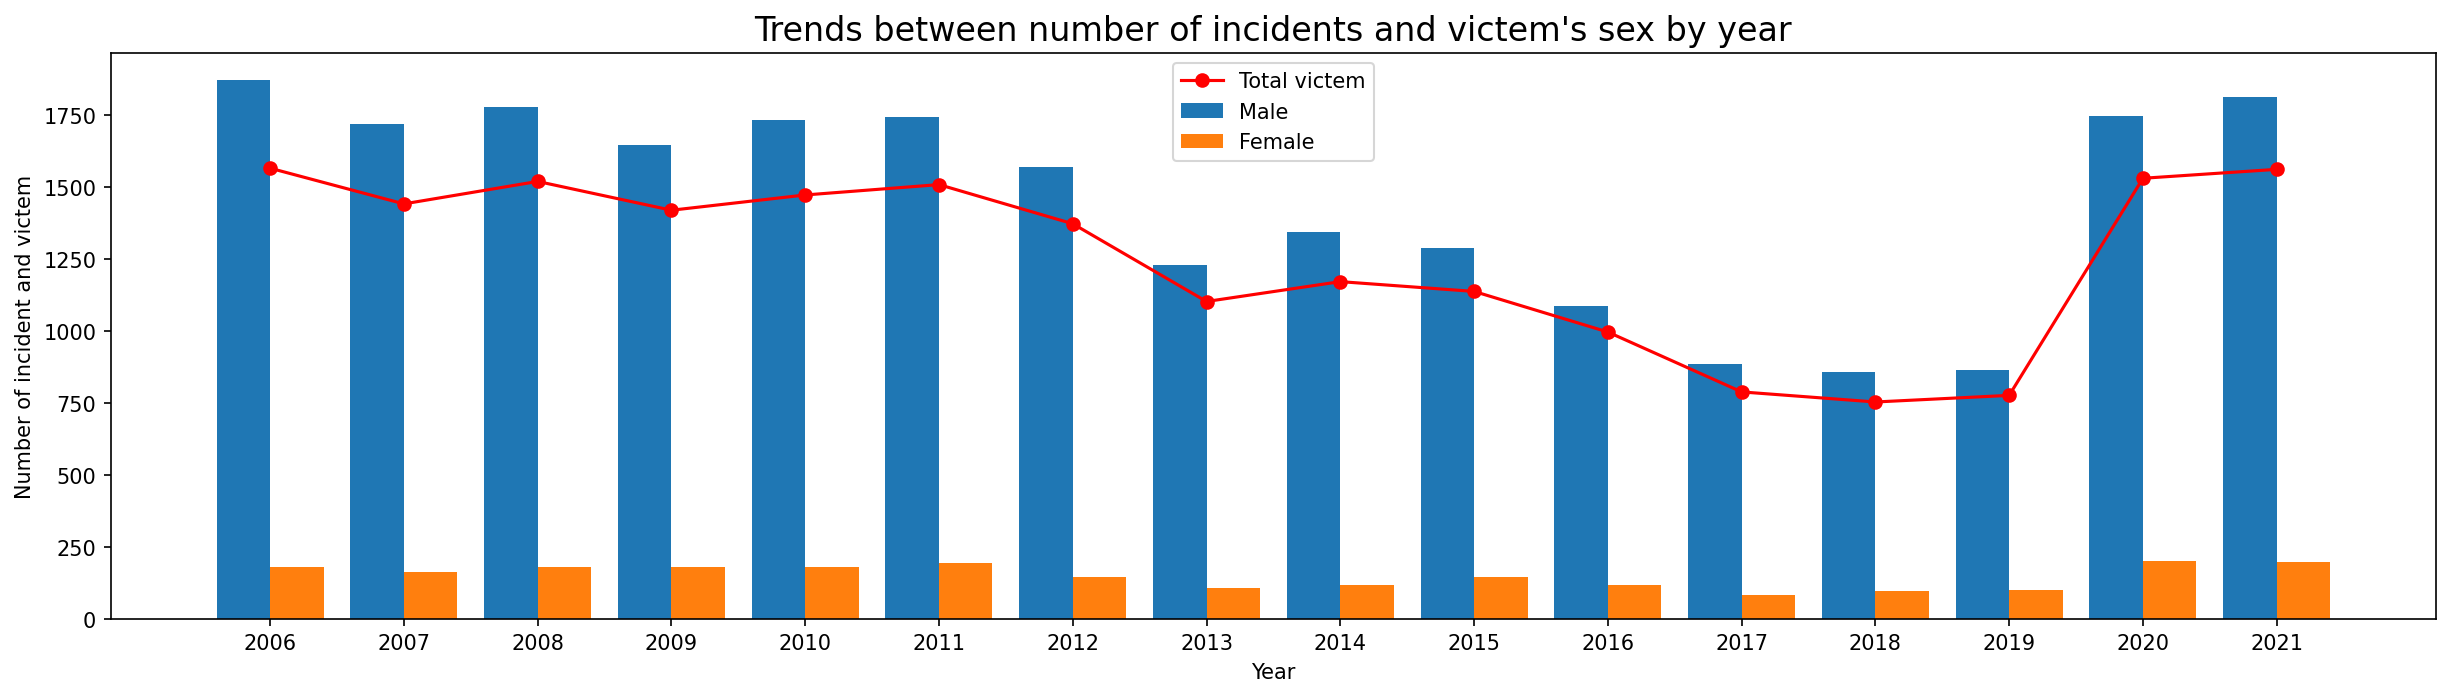

"Table Number of victem's sex"

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
VIC_SEX,,,,,,,,,,,,,,,,
F,182.0,162.0,182.0,181.0,180.0,194.0,146.0,107.0,120.0,145.0,119.0,84.0,99.0,102.0,201.0,199.0
M,1873.0,1721.0,1777.0,1645.0,1732.0,1745.0,1571.0,1231.0,1344.0,1289.0,1087.0,886.0,857.0,865.0,1747.0,1812.0
U,0.0,4.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0
total_vic,2055.0,1887.0,1959.0,1828.0,1912.0,1939.0,1717.0,1339.0,1464.0,1434.0,1208.0,970.0,958.0,967.0,1948.0,2011.0


'Table Number of incidents'

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
case,1566,1442,1520,1420,1473,1509,1373,1103,1172,1138,997,789,754,777,1531,1562


In [ ]:
x = visual_1['year']
f = visual_1['F']
m = visual_1['M']
y2 = visual_1['total_vic']
  
plt.figure(figsize=(20,5),dpi=150)  
plt.bar(x - 0.2, m, 0.4, label = 'Male')
plt.bar(x + 0.2, f, 0.4, label = 'Female')

plt.plot(year_case.year, year_case.case , 'r-o',label="Total victem")

plt.xticks(x)
plt.xlabel("Year")
plt.ylabel("Number of incident and victem")
plt.title("Trends between number of incidents and victem's sex by year",fontsize=16)
plt.legend()
plt.show()

display("Table Number of victem's sex")
display(table_des)
display("Table Number of incidents")
display(table_case)

###**กราฟรายเดือน**

In [ ]:
visual_m = df.groupby(['month','VIC_SEX']).agg(no_inci=('INCIDENT_KEY', 'count')).reset_index()
visual_m = pd.pivot_table(visual_m, values='no_inci', index=['month'],columns=['VIC_SEX'], aggfunc=np.sum).reset_index()
visual_m.fillna(0,inplace=True)
visual_m['total_vic']=visual_m['F']+visual_m['M']+visual_m['U']
visual_m

VIC_SEX,month,F,M,U,total_vic
0,1,140.0,1460.0,0.0,1600.0
1,2,118.0,1120.0,0.0,1238.0
2,3,136.0,1395.0,1.0,1532.0
3,4,169.0,1659.0,0.0,1828.0
4,5,214.0,2186.0,1.0,2401.0
5,6,269.0,2386.0,2.0,2657.0
6,7,308.0,2701.0,0.0,3009.0
7,8,306.0,2696.0,0.0,3002.0
8,9,231.0,2184.0,1.0,2416.0
9,10,211.0,1963.0,2.0,2176.0


In [ ]:
# ให้ง่ายต่อการทำความเข้าจึงทำการ transpose table
table_des_m = visual_m
table_des_m['month'] = table_des_m['month'].astype('object')
table_des_m = table_des_m.T
table_des_m.columns = table_des_m.iloc[0]
table_des_m = table_des_m.drop('month',axis=0)
table_des_m

month,1,2,3,4,5,6,7,8,9,10,11,12
VIC_SEX,,,,,,,,,,,,
F,140.0,118.0,136.0,169.0,214.0,269.0,308.0,306.0,231.0,211.0,158.0,143.0
M,1460.0,1120.0,1395.0,1659.0,2186.0,2386.0,2701.0,2696.0,2184.0,1963.0,1683.0,1749.0
U,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,2.0,2.0,2.0
total_vic,1600.0,1238.0,1532.0,1828.0,2401.0,2657.0,3009.0,3002.0,2416.0,2176.0,1843.0,1894.0


In [ ]:
month_case = df_case.groupby('month').agg(case = ('INCIDENT_KEY','count')).reset_index()
month_case

,month,case
0,1,1270
1,2,980
2,3,1214
3,4,1478
4,5,1853
5,6,2085
6,7,2324
7,8,2346
8,9,1898
9,10,1703


In [ ]:
table_case_m = month_case.T
table_case_m.columns = table_case_m.iloc[0]
table_case_m = table_case_m.drop('month',axis=0)
table_case_m

month,1,2,3,4,5,6,7,8,9,10,11,12
case,1270,980,1214,1478,1853,2085,2324,2346,1898,1703,1453,1522


In [ ]:
visual_m.month = visual_m['month'].astype('int')

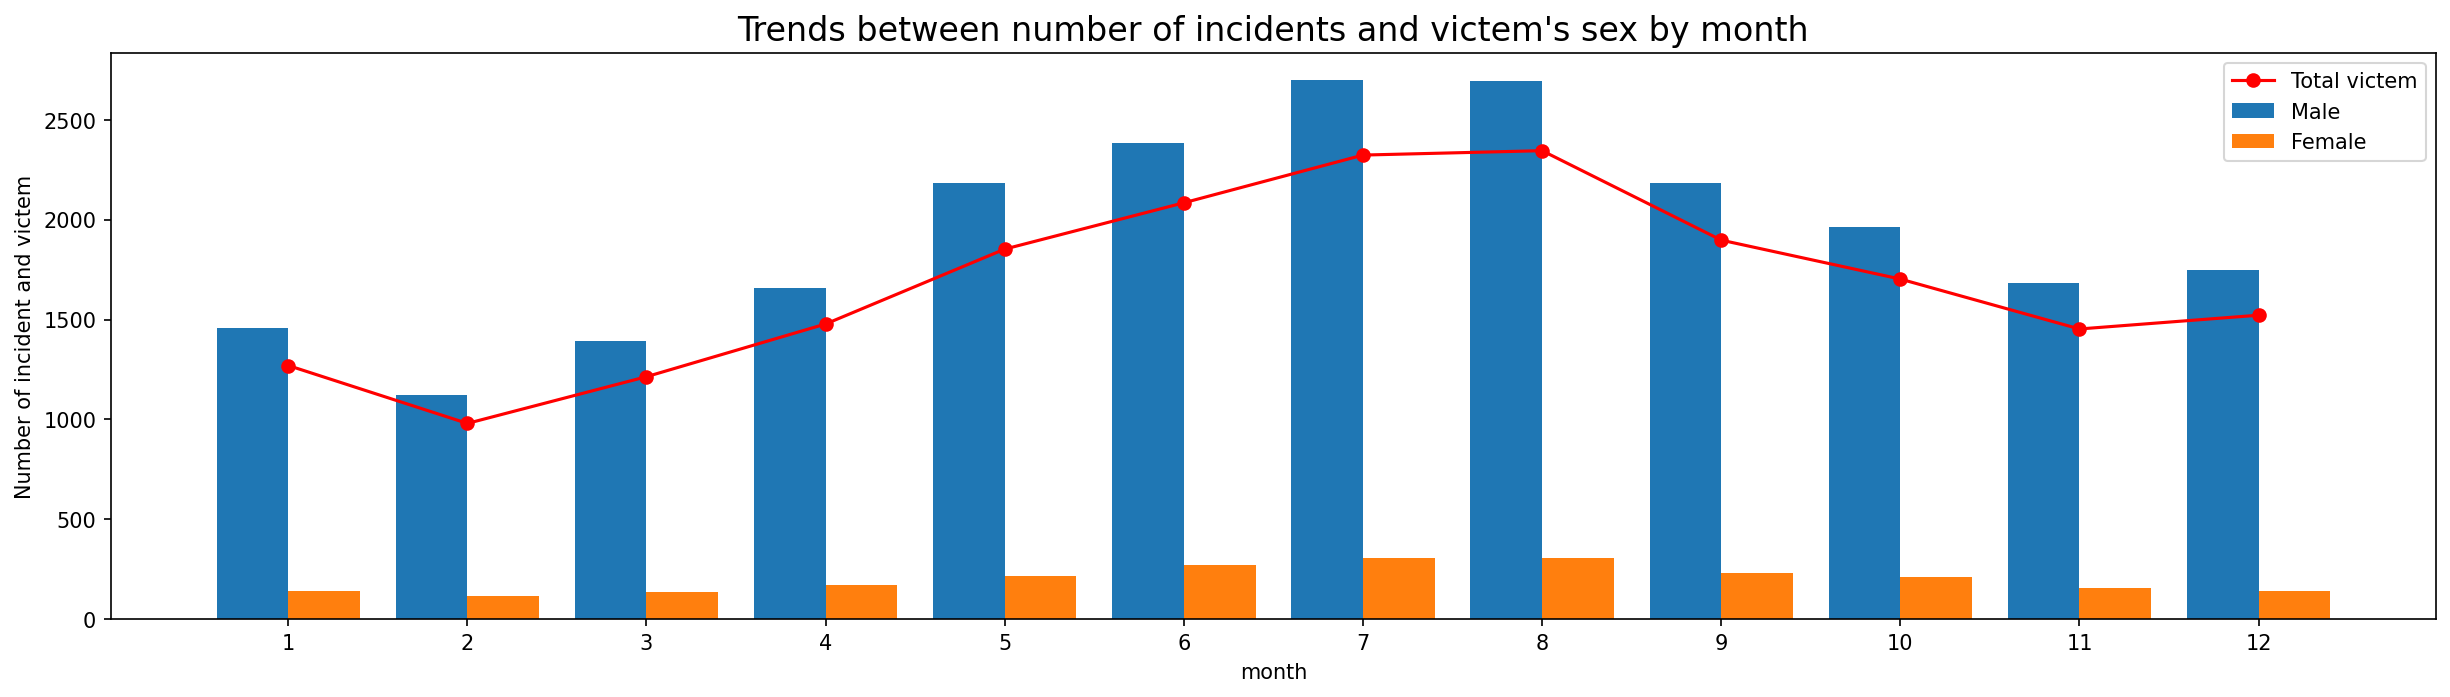

"Table Number of victem's sex"

month,1,2,3,4,5,6,7,8,9,10,11,12
VIC_SEX,,,,,,,,,,,,
F,140.0,118.0,136.0,169.0,214.0,269.0,308.0,306.0,231.0,211.0,158.0,143.0
M,1460.0,1120.0,1395.0,1659.0,2186.0,2386.0,2701.0,2696.0,2184.0,1963.0,1683.0,1749.0
U,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,2.0,2.0,2.0
total_vic,1600.0,1238.0,1532.0,1828.0,2401.0,2657.0,3009.0,3002.0,2416.0,2176.0,1843.0,1894.0


'Table Number of incidents'

month,1,2,3,4,5,6,7,8,9,10,11,12
case,1270,980,1214,1478,1853,2085,2324,2346,1898,1703,1453,1522


In [ ]:

x = visual_m['month']
f = visual_m['F']
m = visual_m['M']
y2 = visual_m['total_vic']
  
plt.figure(figsize=(20,5),dpi=150)  
plt.bar(x - 0.2, m, 0.4, label = 'Male')
plt.bar(x + 0.2, f, 0.4, label = 'Female')

plt.plot(month_case.month, month_case.case , 'r-o',label="Total victem")

plt.xticks(x)
plt.xlabel("month")
plt.ylabel("Number of incident and victem")
plt.title("Trends between number of incidents and victem's sex by month",fontsize=16)
plt.legend()
plt.show()

display("Table Number of victem's sex")
display(table_des_m)
display("Table Number of incidents")
display(table_case_m)

###**กราฟรายสัปดาห์**

In [ ]:
visual_w = df.groupby(['week','VIC_SEX']).agg(no_inci=('INCIDENT_KEY', 'count')).reset_index()
visual_w = pd.pivot_table(visual_w, values='no_inci', index=['week'],columns=['VIC_SEX'], aggfunc=np.sum).reset_index()
visual_w.fillna(0,inplace=True)
visual_w['total_vic']=visual_w['F']+visual_w['M']+visual_w['U']
visual_w

VIC_SEX,week,F,M,U,total_vic
0,1,38.0,387.0,0.0,425.0
1,2,30.0,339.0,0.0,369.0
2,3,19.0,313.0,0.0,332.0
3,4,44.0,279.0,0.0,323.0
4,5,21.0,306.0,0.0,327.0
5,6,30.0,263.0,0.0,293.0
6,7,25.0,268.0,0.0,293.0
7,8,31.0,287.0,0.0,318.0
8,9,30.0,244.0,0.0,274.0
9,10,34.0,304.0,0.0,338.0


In [ ]:
# ให้ง่ายต่อการทำความเข้าจึงทำการ transpose table top 10
table_des_w = visual_w
table_des_w['week'] = table_des_w['week'].astype('object')
table_des_w = table_des_w.sort_values(by='total_vic',ascending=False).head(10)
table_des_w = table_des_w.T
table_des_w.columns = table_des_w.iloc[0]
table_des_w = table_des_w.drop('week',axis=0)
print('TOP 10 : Total victem by week')
display(table_des_w)


TOP 10 : Total victem by week


week,27,26,34,35,31,32,25,36,33,22
VIC_SEX,,,,,,,,,,
F,79.0,93.0,63.0,67.0,78.0,84.0,56.0,73.0,55.0,65.0
M,706.0,634.0,630.0,622.0,605.0,589.0,612.0,586.0,598.0,585.0
U,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
total_vic,785.0,727.0,693.0,689.0,683.0,673.0,670.0,659.0,653.0,650.0


In [ ]:
visual_w['week'] = visual_w['week'].astype('int')

In [ ]:
week_case = df_case.groupby('week').agg(case = ('INCIDENT_KEY','count')).reset_index()
week_case

,week,case
0,1,322
1,2,288
2,3,273
3,4,260
4,5,256
5,6,236
6,7,237
7,8,248
8,9,224
9,10,274


In [ ]:
table_case_w = week_case.sort_values(by='case',ascending=False).head(10)
table_case_w = table_case_w.T
table_case_w.columns = table_case_w.iloc[0]
table_case_w = table_case_w.drop('week',axis=0)
table_case_w

week,27,26,34,31,25,35,36,32,30,28
case,613,554,542,542,534,529,508,508,507,504


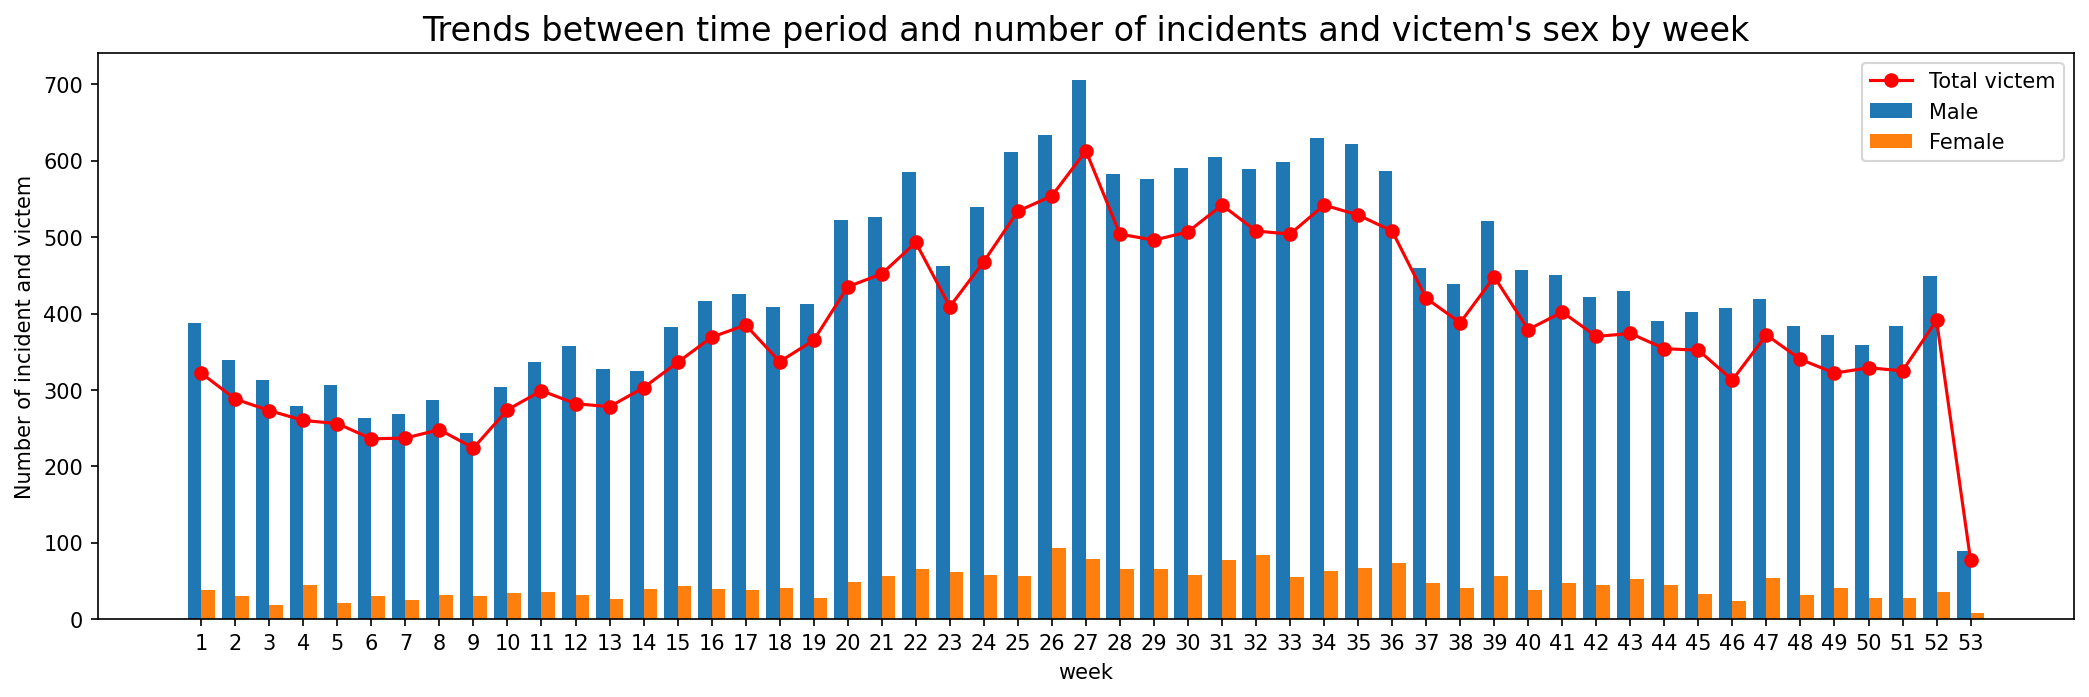

'TOP 10 : Total victem '

week,27,26,34,35,31,32,25,36,33,22
VIC_SEX,,,,,,,,,,
F,79.0,93.0,63.0,67.0,78.0,84.0,56.0,73.0,55.0,65.0
M,706.0,634.0,630.0,622.0,605.0,589.0,612.0,586.0,598.0,585.0
U,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
total_vic,785.0,727.0,693.0,689.0,683.0,673.0,670.0,659.0,653.0,650.0


'TOP 10 : Total incident '

week,27,26,34,31,25,35,36,32,30,28
case,613,554,542,542,534,529,508,508,507,504


In [ ]:
x = visual_w['week']
f = visual_w['F']
m = visual_w['M']
y2 = visual_w['total_vic']
  
plt.figure(figsize=(17,5),dpi=150)  
plt.bar(x - 0.2, m, 0.4, label = 'Male')
plt.bar(x + 0.2, f, 0.4, label = 'Female')

plt.plot(week_case.week, week_case.case , 'r-o',label="Total victem")

plt.xticks(x)
plt.xlabel("week")
plt.ylabel("Number of incident and victem")
plt.title("Trends between time period and number of incidents and victem's sex by week",fontsize=16)
plt.legend()
plt.show()

display("TOP 10 : Total victem ")
display(table_des_w)
display("TOP 10 : Total incident ")
display(table_case_w)



### กราฟช่วงเวลาของวัน

In [ ]:
# pivot table เพื่อให้ summary ข้อมูลและนำทำกราฟต่อไป
visual_d = df.groupby(['part_of_day','VIC_SEX']).agg(no_inci=('INCIDENT_KEY', 'count')).reset_index()
visual_d = pd.pivot_table(visual_d, values='no_inci', index=['part_of_day'],columns=['VIC_SEX'], aggfunc=np.sum).reset_index()
visual_d.fillna(0,inplace=True)
visual_d['total_vic']=visual_d['F']+visual_d['M']+visual_d['U']
visual_d

VIC_SEX,part_of_day,F,M,U,total_vic
0,Afternoon,311,3202,2,3515
1,Evening,471,4612,3,5086
2,Morning,246,1997,1,2244
3,Night,1375,13371,5,14751


In [ ]:
# ให้ง่ายต่อการทำความเข้าจึงทำการ transpose table
table_des_d = visual_d
table_des_d = table_des_d.T
table_des_d.columns = table_des_d.iloc[0]
table_des_d = table_des_d.drop('part_of_day',axis=0)
table_des_d

part_of_day,Afternoon,Evening,Morning,Night
VIC_SEX,,,,
F,311,471,246,1375
M,3202,4612,1997,13371
U,2,3,1,5
total_vic,3515,5086,2244,14751


In [ ]:
visual_d1 = visual_d.set_index('part_of_day')

In [ ]:
day_case = df_case.groupby('part_of_day').agg(case = ('INCIDENT_KEY','count')).reset_index()
day_case

,part_of_day,case
0,Afternoon,2812
1,Evening,3960
2,Morning,1836
3,Night,11518


In [ ]:
table_case_d = day_case.T
table_case_d.columns = table_case_d.iloc[0]
table_case_d = table_case_d.drop('part_of_day',axis=0)
table_case_d

part_of_day,Afternoon,Evening,Morning,Night
case,2812,3960,1836,11518


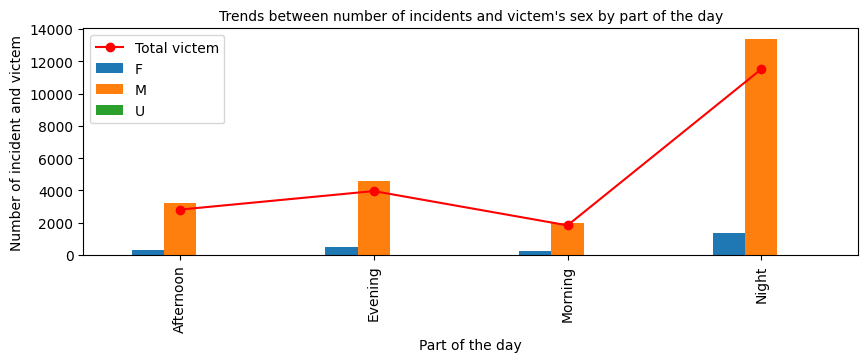

"Table Number of victem's sex"

part_of_day,Afternoon,Evening,Morning,Night
VIC_SEX,,,,
F,311,471,246,1375
M,3202,4612,1997,13371
U,2,3,1,5
total_vic,3515,5086,2244,14751


'Table Number of incidents'

part_of_day,Afternoon,Evening,Morning,Night
case,2812,3960,1836,11518


In [ ]:
plt.figure(figsize=(10,3),dpi=100)
visual_d1[['F','M',	'U']].plot.bar(ax=plt.axes())
plt.plot(day_case.part_of_day,  day_case.case, 'r-o',label="Total victem",)

plt.xlabel("Part of the day")
plt.ylabel("Number of incident and victem")
plt.title("Trends between number of incidents and victem's sex by part of the day",fontsize=10)
plt.legend()
plt.show()

display("Table Number of victem's sex")
display(table_des_d)
display("Table Number of incidents")
display(table_case_d)


## จากคดีอาชญากรรมสู่คดีฆาตกรรม

In [ ]:
# เปลี่ยน STATISTICAL_MURDER_FLAG คือ การเปลี่ยนจากคดีอาชญากรรมเป็นคดีฆาตกรรมเมื่อมีผู้เสียชีวิตในเหตุการณ์
df['MURDER_FLAG'] = df['STATISTICAL_MURDER_FLAG'].apply(lambda x: 1 if x== True else 0)
df

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,Latitude,Longitude,Lon_Lat,hour,part_of_day,year,month,week,month_name,MURDER_FLAG
0,236168668,2021-11-11,15:04:00,BROOKLYN,79,0.0,UNKNOWN,False,UNKNOWN,U,...,40.681318,-73.956509,POINT (-73.95650899099996 40.68131820000008),15,Afternoon,2021,11,45,November,0
1,231008085,2021-07-16,22:05:00,BROOKLYN,72,0.0,UNKNOWN,False,45-64,M,...,40.636364,-74.008667,POINT (-74.00866668999998 40.63636384100005),22,Night,2021,7,28,July,0
2,230717903,2021-07-11,01:09:00,BROOKLYN,79,0.0,UNKNOWN,False,<18,M,...,40.681145,-73.955669,POINT (-73.95566903799994 40.68114495900005),1,Night,2021,7,27,July,0
3,237712309,2021-12-11,13:42:00,BROOKLYN,81,0.0,UNKNOWN,False,UNKNOWN,U,...,40.695792,-73.939096,POINT (-73.939095905 40.69579171600003),13,Afternoon,2021,12,49,December,0
4,224465521,2021-02-16,20:00:00,QUEENS,113,0.0,UNKNOWN,False,UNKNOWN,U,...,40.673740,-73.760411,POINT (-73.76041066999993 40.67374017600008),20,Evening,2021,2,7,February,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25591,186329304,2018-08-12,19:50:00,BROOKLYN,84,0.0,UNKNOWN,False,25-44,M,...,40.696875,-73.982314,POINT (-73.98231375199998 40.69687491500008),19,Evening,2018,8,32,August,0
25592,29277330,2007-05-26,04:57:00,BROOKLYN,81,0.0,UNKNOWN,False,UNKNOWN,U,...,40.689615,-73.924393,POINT (-73.92439311199996 40.689615497000034),4,Night,2007,5,21,May,0
25593,77443443,2011-02-25,01:12:00,BROOKLYN,81,0.0,MULTI DWELL - APT BUILD,False,18-24,M,...,40.681612,-73.928798,POINT (-73.92879814299994 40.681611891000045),1,Night,2011,2,8,February,0
25594,176027888,2018-03-17,00:46:00,BRONX,43,0.0,UNKNOWN,False,25-44,M,...,40.832893,-73.875408,POINT (-73.87540796899998 40.83289318000004),0,Night,2018,3,11,March,0


In [ ]:
#จำนวนการเกิดเหตุการณ์โดยที่นับเฉพาะ unique INCIDENT_KEY
murder_case = df[['MURDER_FLAG','INCIDENT_KEY','year']].groupby(['year','INCIDENT_KEY']).agg(MURDER_FLAG = ('MURDER_FLAG','sum')).reset_index()
murder_case

,year,INCIDENT_KEY,MURDER_FLAG
0,2006,9953245,0
1,2006,9953246,0
2,2006,9953247,0
3,2006,9953248,0
4,2006,9953249,1
...,...,...,...
20121,2021,238481445,0
20122,2021,238481446,0
20123,2021,238483067,0
20124,2021,238487793,0


In [ ]:
# เนื่องจากนับเพียงคดีที่เกิดเหตุมีผู้เสียชีวิตจึงจำนวนต้องเปลี่ยนค่าเพื่อนับ
murder_case['MURDER_FLAG'] = murder_case['MURDER_FLAG'].apply(lambda x: 1 if x > 1 else x)

In [ ]:
visual_2 = murder_case.groupby(['year']).agg(murder_case =('MURDER_FLAG', 'sum')).reset_index()
visual_2

,year,murder_case
0,2006,339
1,2007,304
2,2008,288
3,2009,280
4,2010,311
5,2011,292
6,2012,230
7,2013,179
8,2014,179
9,2015,218


In [ ]:
#จำนวนการเกิดเหตุการณ์โดยที่นับเฉพาะ unique INCIDENT_KEY
_case = df[['year','INCIDENT_KEY']].drop_duplicates(subset=['INCIDENT_KEY'])
_case

,year,INCIDENT_KEY
0,2021,236168668
1,2021,231008085
2,2021,230717903
3,2021,237712309
4,2021,224465521
...,...,...
25591,2018,186329304
25592,2007,29277330
25593,2011,77443443
25594,2018,176027888


In [ ]:
_case = _case.groupby('year').agg(case = ('INCIDENT_KEY','count')).reset_index()
_case

,year,case
0,2006,1566
1,2007,1442
2,2008,1520
3,2009,1420
4,2010,1473
5,2011,1509
6,2012,1373
7,2013,1103
8,2014,1172
9,2015,1138


In [ ]:
df_vis2 = visual_2.merge(_case,left_on = 'year',right_on='year')
df_vis2['%rate'] = round((df_vis2['murder_case']/df_vis2.case)*100,2)
df_vis2

,year,murder_case,case,%rate
0,2006,339,1566,21.65
1,2007,304,1442,21.08
2,2008,288,1520,18.95
3,2009,280,1420,19.72
4,2010,311,1473,21.11
5,2011,292,1509,19.35
6,2012,230,1373,16.75
7,2013,179,1103,16.23
8,2014,179,1172,15.27
9,2015,218,1138,19.16


In [ ]:
# ให้ง่ายต่อการทำความเข้าจึงทำการ transpose table
table_des_mur = df_vis2
table_des_mur['year'] = table_des_mur['year'].astype('int')
table_des_mur['year'] = table_des_mur['year'].astype('object')
table_des_mur = table_des_mur.T
table_des_mur.columns = table_des_mur.iloc[0]
table_des_mur = table_des_mur.drop('year',axis=0)
table_des_mur

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
murder_case,339,304,288,280,311,292,230,179,179,218,191,142,153,147,280,319
case,1566,1442,1520,1420,1473,1509,1373,1103,1172,1138,997,789,754,777,1531,1562
%rate,21.65,21.08,18.95,19.72,21.11,19.35,16.75,16.23,15.27,19.16,19.16,18.0,20.29,18.92,18.29,20.42


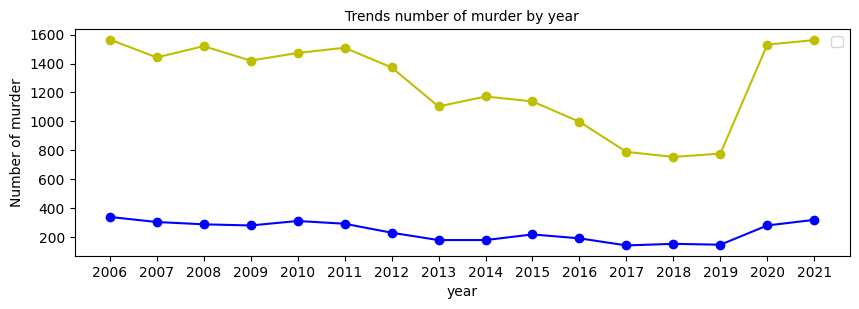

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
murder_case,339,304,288,280,311,292,230,179,179,218,191,142,153,147,280,319
case,1566,1442,1520,1420,1473,1509,1373,1103,1172,1138,997,789,754,777,1531,1562
%rate,21.65,21.08,18.95,19.72,21.11,19.35,16.75,16.23,15.27,19.16,19.16,18.0,20.29,18.92,18.29,20.42


In [ ]:
plt.figure(figsize=(10,3),dpi=100)
plt.plot(visual_2['year'],  visual_2['murder_case'], 'b-o')
plt.plot(df_vis2['year'],  df_vis2['case'], 'y-o')

plt.xticks(visual_2['year'])
plt.xlabel("year")
plt.ylabel("Number of murder")
plt.title("Trends number of murder by year",fontsize=10)
plt.show()

display(table_des_mur)

## สัดส่วนของเพศ ช่วงอายุ ของผู้ก่ออาชญากรรม


In [ ]:
#จำนวนการเกิดเหตุการณ์โดยที่นับเฉพาะ unique INCIDENT_KEY
perp_case = df[['PERP_SEX','PERP_AGE_GROUP','INCIDENT_KEY']].drop_duplicates(subset=['INCIDENT_KEY'])
perp_case

,PERP_SEX,PERP_AGE_GROUP,INCIDENT_KEY
0,U,UNKNOWN,236168668
1,M,45-64,231008085
2,M,<18,230717903
3,U,UNKNOWN,237712309
4,U,UNKNOWN,224465521
...,...,...,...
25591,M,25-44,186329304
25592,U,UNKNOWN,29277330
25593,M,18-24,77443443
25594,M,25-44,176027888


In [ ]:
visual_3_sex = perp_case.groupby(['PERP_SEX']).agg(perp =('INCIDENT_KEY', 'count')).reset_index()
visual_3_sex

,PERP_SEX,perp
0,F,212
1,M,10469
2,U,9445


In [ ]:
visual_3_age = perp_case.groupby(['PERP_AGE_GROUP']).agg(perp =('INCIDENT_KEY', 'count')).reset_index()
visual_3_age

,PERP_AGE_GROUP,perp
0,18-24,4086
1,25-44,3769
2,45-64,374
3,65+,44
4,<18,993
5,UNKNOWN,10860


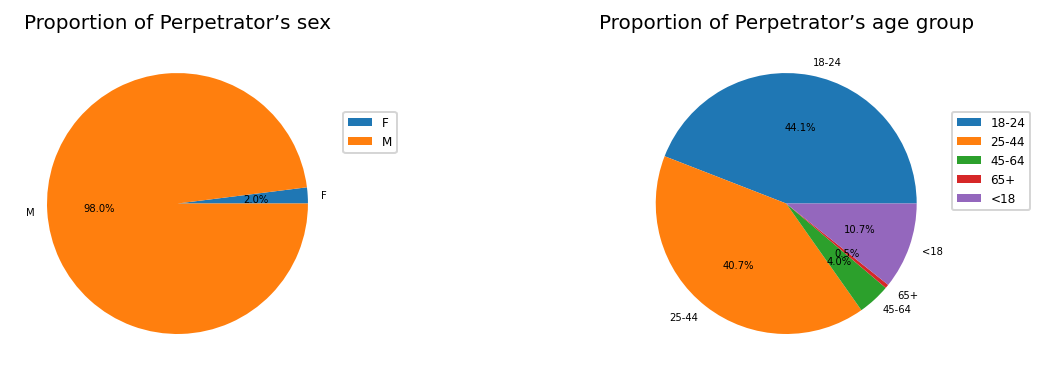

In [ ]:
fig = plt.figure(figsize=(10,3),dpi=144)

ax1 = fig.add_subplot(1,2,1)
ax1.pie(visual_3_sex['perp'].iloc[:2], labels = visual_3_sex['PERP_SEX'].iloc[:2],autopct='%1.1f%%',textprops={'fontsize': 5}) 
ax1.set_title("Proportion of Perpetrator’s sex",fontsize=10)
ax1.legend()
ax1.legend(bbox_to_anchor=(0.99, 0.8),fontsize=6)

ax2 = fig.add_subplot(1,2,2)
ax2.pie(visual_3_age['perp'].iloc[:5], labels = visual_3_age['PERP_AGE_GROUP'].iloc[:5],autopct='%1.1f%%',textprops={'fontsize': 5}) 
ax2.set_title("Proportion of Perpetrator’s age group",fontsize=10)
ax2.legend(bbox_to_anchor=(0.99, 0.8),fontsize=6)

## สถานที่เกิดเหตุที่เกิดเหตุ

In [ ]:
df.columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'PRECINCT',
       'JURISDICTION_CODE', 'LOCATION_DESC', 'STATISTICAL_MURDER_FLAG',
       'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX',
       'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lon_Lat', 'hour', 'part_of_day', 'year', 'month', 'week', 'month_name',
       'MURDER_FLAG'],
      dtype='object')

In [ ]:
#จำนวนการเกิดเหตุการณ์โดยที่นับเฉพาะ unique INCIDENT_KEY
boro_case = df[['BORO','INCIDENT_KEY']].drop_duplicates(subset=['INCIDENT_KEY','BORO'])
boro_case

,BORO,INCIDENT_KEY
0,BROOKLYN,236168668
1,BROOKLYN,231008085
2,BROOKLYN,230717903
3,BROOKLYN,237712309
4,QUEENS,224465521
...,...,...
25591,BROOKLYN,186329304
25592,BROOKLYN,29277330
25593,BROOKLYN,77443443
25594,BRONX,176027888


In [ ]:
visual_4 = boro_case.groupby(['INCIDENT_KEY','BORO']).agg(boro_case=('BORO','count')).reset_index()
visual_4

,INCIDENT_KEY,BORO,boro_case
0,9953245,BRONX,1
1,9953246,BRONX,1
2,9953247,BROOKLYN,1
3,9953248,QUEENS,1
4,9953249,BROOKLYN,1
...,...,...,...
20121,238481445,BROOKLYN,1
20122,238481446,BRONX,1
20123,238483067,MANHATTAN,1
20124,238487793,BROOKLYN,1


In [ ]:
visual_4 = visual_4.groupby(['BORO']).agg(case=('BORO','count')).reset_index()

In [ ]:
visual_4

,BORO,case
0,BRONX,5611
1,BROOKLYN,8357
2,MANHATTAN,2536
3,QUEENS,3031
4,STATEN ISLAND,591


In [ ]:
visual_4['label']=visual_4['BORO'] + " (" + visual_4["case"].astype("str") + " case"+")"
visual_4

,BORO,case,label
0,BRONX,5611,BRONX (5611 case)
1,BROOKLYN,8357,BROOKLYN (8357 case)
2,MANHATTAN,2536,MANHATTAN (2536 case)
3,QUEENS,3031,QUEENS (3031 case)
4,STATEN ISLAND,591,STATEN ISLAND (591 case)


In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


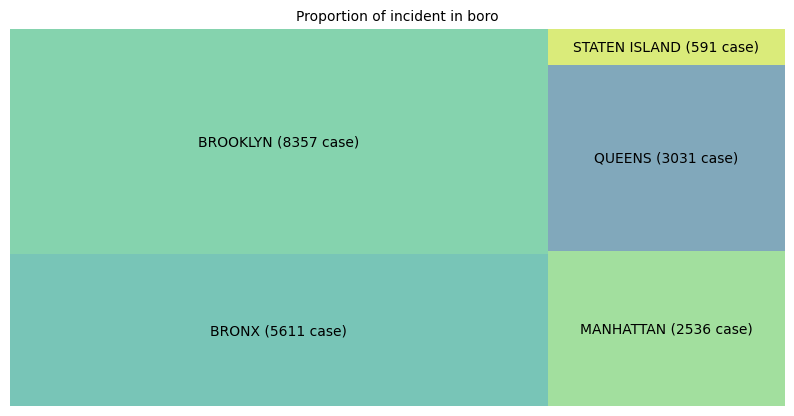

In [ ]:
import squarify 

plt.figure(figsize=(10,5),dpi=100)  
squarify.plot(sizes=visual_4.case, label=visual_4.label, alpha=0.6)
plt.title("Proportion of incident in boro",fontsize=10)
plt.axis('off')
plt.show()